# ИКМ

1) Первые строки данных:
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        modera

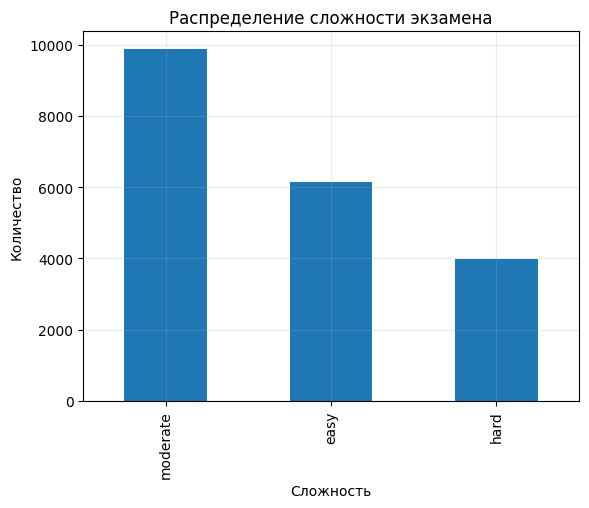

8) Круговая диаграмма - распределение по полу


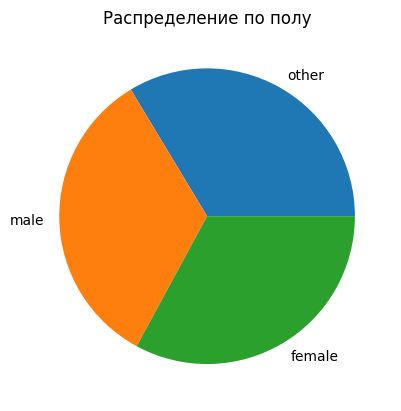

9) Группировка по сложности экзамена:
                exam_score        study_hours
                      mean    max        mean
exam_difficulty                              
easy             62.383022  100.0    3.980344
hard             62.629580  100.0    4.034562
moderate         62.547277  100.0    4.013686

10) Новый признак 'passed_exam' (1 - сдал, 0 - не сдал) если оценка > 50:
   exam_score  passed_exam
0        58.9            1
1        54.8            1
2        90.3            1
3        29.7            0
4        43.7            0
5        58.2            1
6        53.7            1
7        47.3            0
8        44.9            0
9        77.7            1

11) Диаграммы рассеяния для изучения зависимостей:
Зависимость exam_score от study_hours:


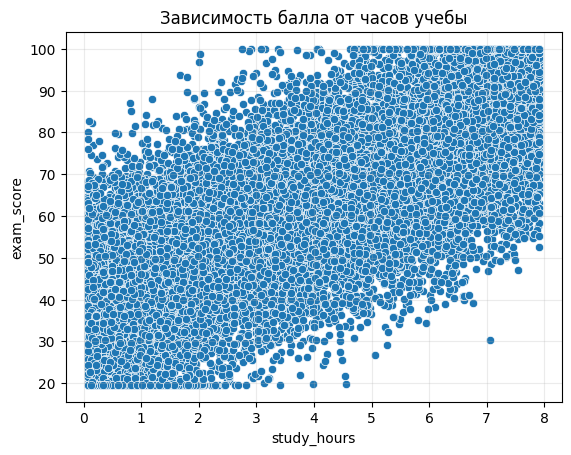

Зависимость exam_score от class_attendance:


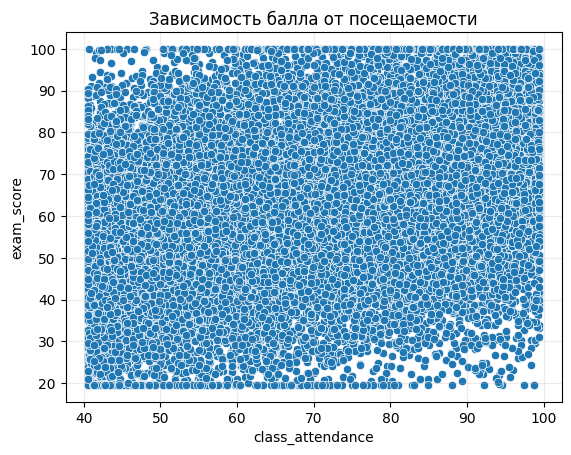

Зависимость exam_score от sleep_hours:


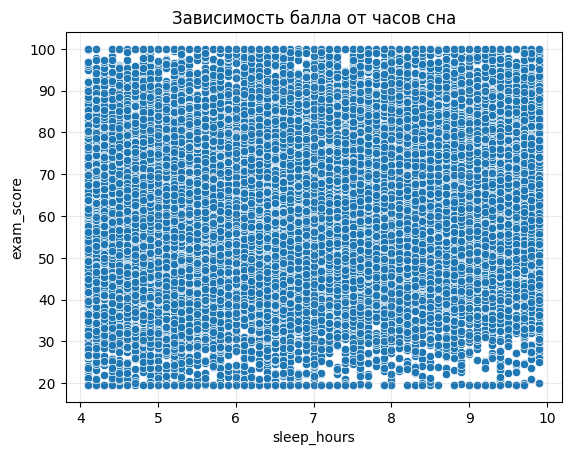

Вывод: наблюдается положительная связь между баллами и часами учебы

12) Boxplot для обнаружения выбросов:


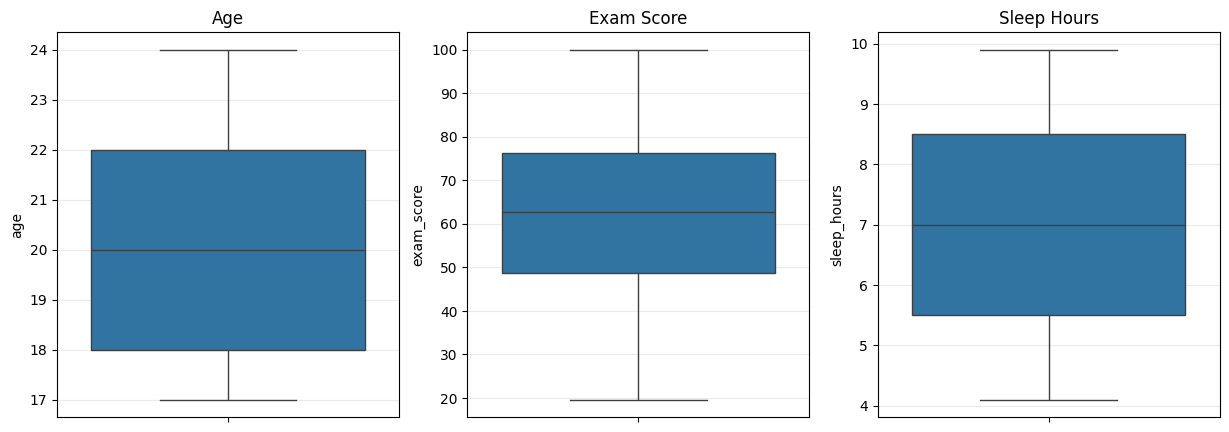

Выбросы в exam_score: верхняя граница=117.55
Количество выбросов: 0
Выбросов в данных нет

13)тип задачи: регрессия (прогнозирование exam_score)

14) Признаки в моделе: все кроме exam_score, student_id, passed_exam
Целевой признак: exam_score

15) Кодирование категориальных признаков
Категориальные признаки закодированы с помощью One-Hot Encoding
   student_id  age  study_hours  class_attendance  sleep_hours  exam_score  \
0           1   17         2.78              92.9          7.4        58.9   
1           2   23         3.37              64.8          4.6        54.8   
2           3   22         7.88              76.8          8.5        90.3   
3           4   20         0.67              48.4          5.8        29.7   
4           5   20         0.89              71.6          9.8        43.7   

   passed_exam  gender_male  gender_other  course_b.sc  ...  \
0            1         True         False        False  ...   
1            1        False          True        False  

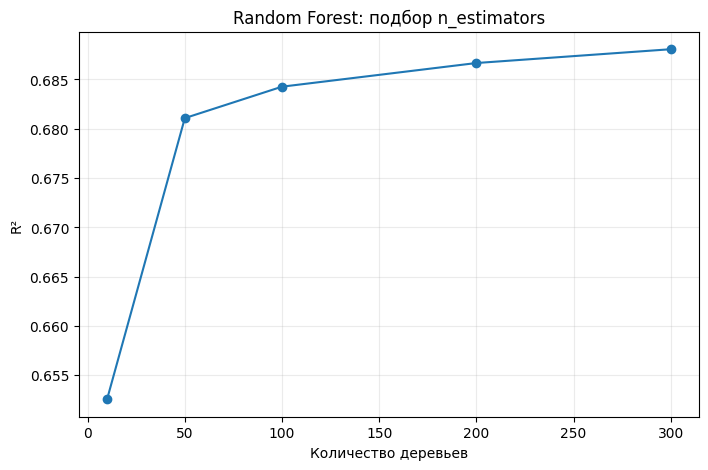

Подбор гиперпараметров Linear Regression 
гиперпараметр: Positive (Все коэффициенты модели будут ≥ 0 если True)
positive=True, R²=0.6619
positive=False, R²=0.7330


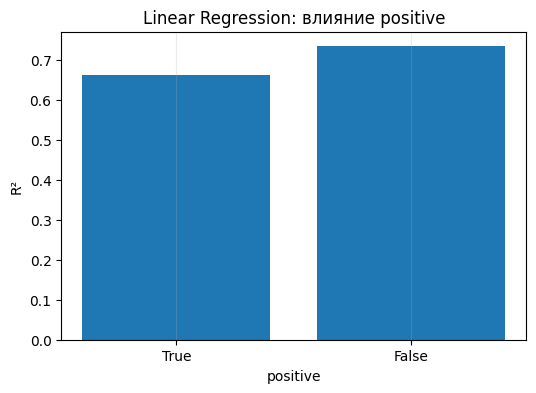

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#1 загрузка данных
df = pd.read_csv("Exam_Score_Prediction.csv")
print("1) Первые строки данных:")
print(df.head())
print()


#2 проверка пропущенных значений
print("2) Пропущенные значения по столбцам:")
print(df.isnull().sum())
print("Вывод: пропущенных значений нет, все данные полные")
print()


#3 определение типов признаков
print("3) Типы признаков:")
print(df.dtypes)
print("Числовые: age, study_hours, class_attendance, sleep_hours, exam_score")
print("Категориальные: gender, course, internet_access, sleep_quality, study_method, facility_rating, exam_difficulty")
print()


#4 простая фильтрация данных
print("4) Фильтрация данных:")
print("Студенты с посещаемостью менее 50%:")
print(df[df["class_attendance"] < 50])
print("\nСтуденты, которые учатся более 6 часов и имеют доступ к интернету:")
print(df[(df["study_hours"] > 6) & (df["internet_access"] == "yes")])
print()


#5 агрегирующие функции
print("5) Агрегирующие запросы:")
print(f"Средний балл за экзамен: {df['exam_score'].mean():.2f}")
print(f"Среднее количество часов сна: {df['sleep_hours'].mean():.2f}")
print()


#6 минимальные и максимальные значения
print("6) Объекты с экстремальными значениями:")
print("Топ-5 студентов с максимальными баллами:")
print(df.nlargest(5, "exam_score")[["student_id", "exam_score"]])
print("\n10% студентов с минимальными баллами:")
print(df.nsmallest(int(0.1 * len(df)), "exam_score")[["student_id", "exam_score"]])
print()


#7 столбчатая диаграмма
print("7) Столбчатая диаграмма - распределение по сложности экзамена")
df["exam_difficulty"].value_counts().plot(kind="bar")
plt.title("Распределение сложности экзамена")
plt.xlabel("Сложность")
plt.ylabel("Количество")
plt.show()


#8 круговая диаграмма
print("8) Круговая диаграмма - распределение по полу")
df["gender"].value_counts().plot(kind="pie")
plt.title("Распределение по полу")
plt.ylabel("")
plt.show()


#9 группировка и агрегация
print("9) Группировка по сложности экзамена:")
print(df.groupby("exam_difficulty").agg({
    "exam_score": ["mean", "max"],
    "study_hours": "mean"
}))
print()


#10 добавление нового признака
df["passed_exam"] = (df["exam_score"] >= 50).astype(int)
print("10) Новый признак 'passed_exam' (1 - сдал, 0 - не сдал) если оценка > 50:")
print(df[["exam_score", "passed_exam"]].head(10))
print()


#11 диаграммы рассеяния
print("11) Диаграммы рассеяния для изучения зависимостей:")
print("Зависимость exam_score от study_hours:")
sns.scatterplot(x="study_hours", y="exam_score", data=df)
plt.title("Зависимость балла от часов учебы")
plt.show()

print("Зависимость exam_score от class_attendance:")
sns.scatterplot(x="class_attendance", y="exam_score", data=df)
plt.title("Зависимость балла от посещаемости")
plt.show()

print("Зависимость exam_score от sleep_hours:")
sns.scatterplot(x="sleep_hours", y="exam_score", data=df)
plt.title("Зависимость балла от часов сна")
plt.show()
print("Вывод: наблюдается положительная связь между баллами и часами учебы")
print()


#12 boxplot и обработка выбросов
print("12) Boxplot для обнаружения выбросов:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df["age"], ax=axes[0])
axes[0].set_title("Age")
sns.boxplot(y=df["exam_score"], ax=axes[1])
axes[1].set_title("Exam Score")
sns.boxplot(y=df["sleep_hours"], ax=axes[2])
axes[2].set_title("Sleep Hours")
plt.show()

Q1 = df["exam_score"].quantile(0.25)
Q3 = df["exam_score"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Выбросы в exam_score: верхняя граница={upper_bound:.2f}")
outliers_count = df[df["exam_score"] > upper_bound].shape[0]
print(f"Количество выбросов: {outliers_count}")
print("Выбросов в данных нет")
print()


#13 выбор типа задачи
print("13)тип задачи: регрессия (прогнозирование exam_score)")
print()


#14 формирование признаков
X = df.drop(columns=["exam_score", "student_id", "passed_exam"])
y = df["exam_score"]
print("14) Признаки в моделе: все кроме exam_score, student_id, passed_exam")
print(f"Целевой признак: exam_score")
print()


print("15) Кодирование категориальных признаков")

categorical_cols = [
    "gender", "course", "internet_access",
    "sleep_quality", "study_method",
    "facility_rating", "exam_difficulty"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Категориальные признаки закодированы с помощью One-Hot Encoding")
print(df_encoded.head())
print()

print("16) Нормализация числовых признаков")

numeric_cols = [
    "age", "study_hours",
    "class_attendance", "sleep_hours"
]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Числовые признаки нормализованы (StandardScaler)")
print(df_encoded[numeric_cols].head())
print()



print("17) Формирование обучающей и тестовой выборки")

X = df_encoded.drop(columns=["exam_score", "student_id", "passed_exam"])
y = df_encoded["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print()


print("18) Обучение Linear Regression")

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)
print("Linear Regression обучена")
print()

print("Обучение Random Forest Regressor")

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest обучен")
print()



print("19) Метрики качества")

print("Linear Regression:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_lin):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lin)):.4f}")
print(f"  R²: {r2_score(y_test, y_pred_lin):.4f}")

print("\nRandom Forest:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print(f"  R²: {r2_score(y_test, y_pred_rf):.4f}")
print()



#20 подбор гиперпараметров
print("20) Подбор гиперпараметров Random Forest, подбираем кол-во деревьев")

n_estimators_list = [10, 50, 100, 200, 300]
r2_scores_rf = []

for n in n_estimators_list:
    model = RandomForestRegressor(
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2_scores_rf.append(r2_score(y_test, preds))

    print(f"n_estimators={n}, R²={r2_scores_rf[-1]:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, r2_scores_rf, marker="o")
plt.xlabel("Количество деревьев")
plt.ylabel("R²")
plt.title("Random Forest: подбор n_estimators")
plt.grid(True)
plt.show()

print("Подбор гиперпараметров Linear Regression ")
print("гиперпараметр: Positive (Все коэффициенты модели будут ≥ 0 если True)")

positive_values = [True, False]
r2_scores_lin = []

for val in positive_values:
    model = LinearRegression(positive=val)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2_scores_lin.append(r2_score(y_test, preds))

    print(f"positive={val}, R²={r2_scores_lin[-1]:.4f}")

plt.figure(figsize=(6, 4))
plt.bar(["True", "False"], r2_scores_lin)
plt.xlabel("positive")
plt.ylabel("R²")
plt.title("Linear Regression: влияние positive")
plt.grid(axis="y")
plt.show()